# Assumptions of Linear Regression
* Non-linear relationships
* Quantile-normal plots and normal residuals
* Correlation of error terms
* Heteroskedasticity
* Outliers
* High-leverage points
* Collinearity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

## Non-linear Relationships

In [2]:
pressure = pd.read_csv('pressure.csv')
pressure.head()

,Unnamed: 0,temperature,pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [3]:
results = smf.ols('pressure ~ temperature', data=pressure).fit()
results.summary()

C:\Users\Chanc\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     22.93
Date:                Thu, 30 May 2024   Prob (F-statistic):           0.000171
Time:                        18:31:55   Log-Likelihood:                -121.21
No. Observations:                  19   AIC:                             246.4
Df Residuals:                      17   BIC:                             248.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -147.8989     66.553     -2.222      0.040    -288.313      -7.485
temperature     1.5124      0.316      4.788      0.000       0.846       2.179
==============================================================================
Omnibus:                        8.041   Durbin-Watson:                   0.241
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                5.267
Skew:                           1.154   Prob(JB):                       0.0718
Kurtosis:                       4.153   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


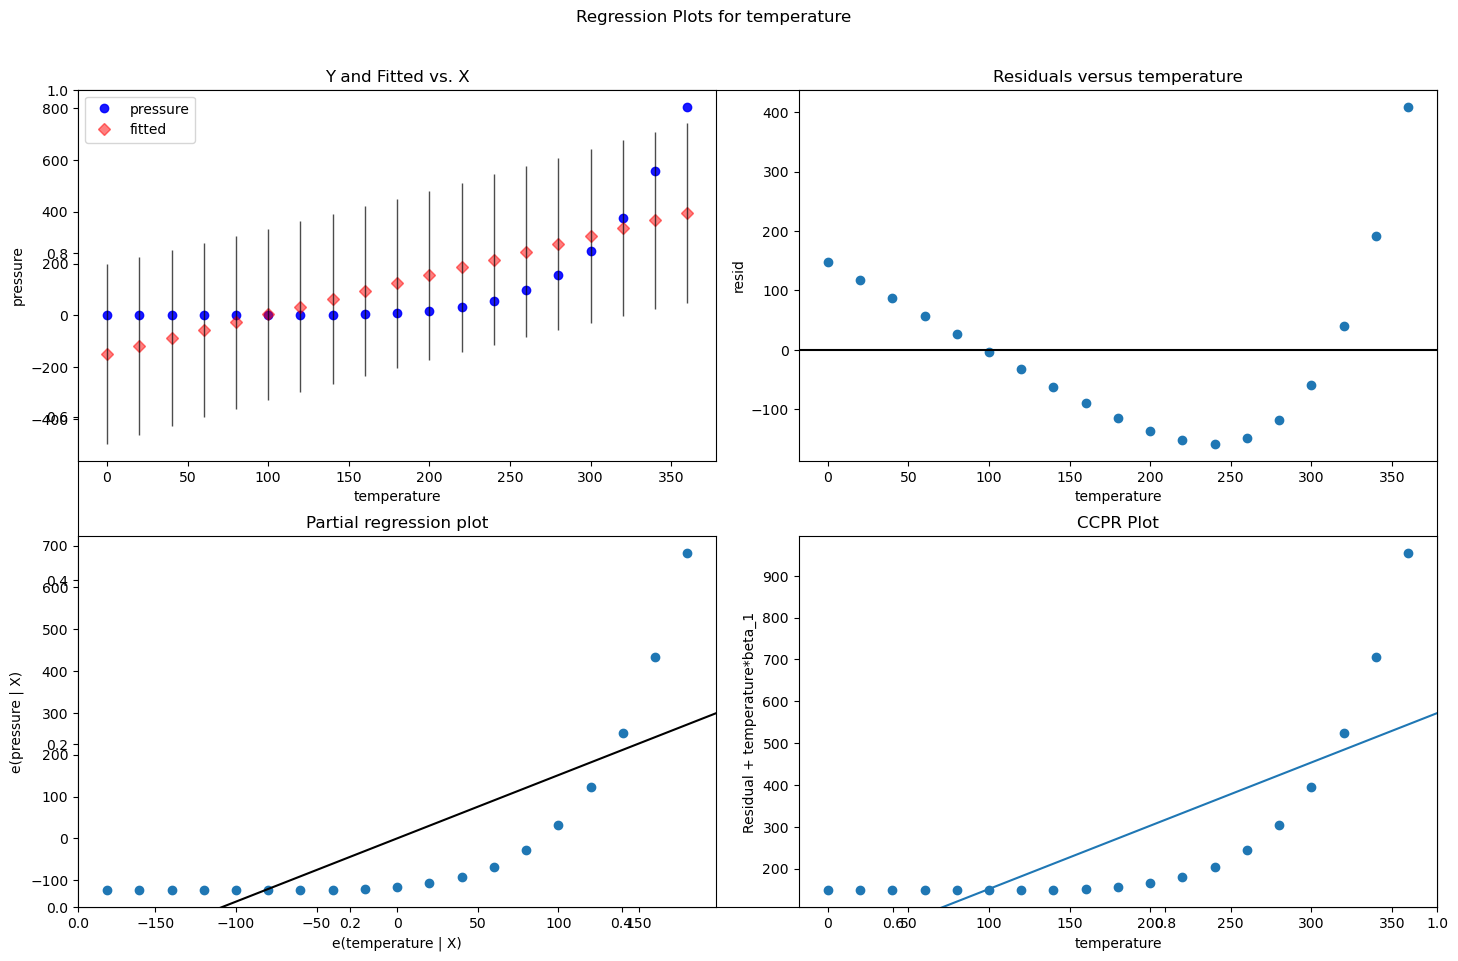

In [4]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'temperature', fig=fig)
plt.show()

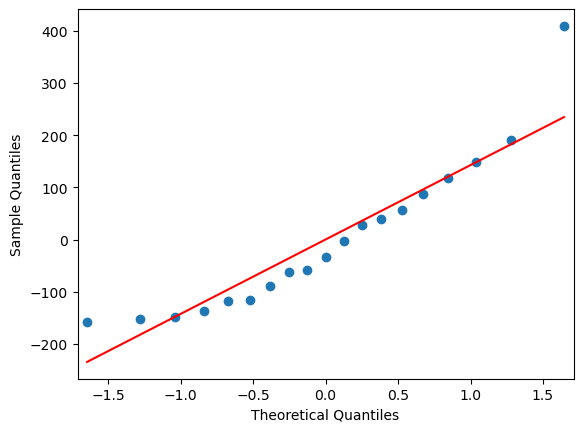

In [5]:
fig = sm.qqplot(results.resid, line="s")

In [6]:
pressure.head()

,Unnamed: 0,temperature,pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [7]:
pressure['temp_squared'] = pressure['temperature']**2
pressure['temp_cubed'] = pressure['temperature']**3
pressure['temp_fourth'] = pressure['temperature']**4


In [8]:
pressure.head()

,Unnamed: 0,temperature,pressure,temp_squared,temp_cubed,temp_fourth
0,1,0,0.0002,0,0,0
1,2,20,0.0012,400,8000,160000
2,3,40,0.0060,1600,64000,2560000
3,4,60,0.0300,3600,216000,12960000
4,5,80,0.0900,6400,512000,40960000


In [9]:
results = smf.ols('pressure ~ temperature + temp_squared + temp_cubed + temp_fourth ', data=pressure).fit()
results.summary()

C:\Users\Chanc\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pressure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7841.
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.81e-23
Time:                        18:31:56   Log-Likelihood:                -56.029
No. Observations:                  19   AIC:                             122.1
Df Residuals:                      14   BIC:                             126.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.4533      4.645      1.389      0.186      -3.509      16.415
temperature     -0.7992      0.189     -4.223      0.001      -1.205      -0.393
temp_squared     0.0159      0.002      7.135      0.000       0.011       0.021
temp_cubed      -0.0001   9.41e-06    -11.179      0.000      -0.000   -8.51e-05
temp_fourth   2.341e-07    1.3e-08     18.056      0.000    2.06e-07    2.62e-07
==============================================================================
Omnibus:                        6.705   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                1.705
Skew:                          -0.016   Prob(JB):                        0.426
Kurtosis:                       1.533   Cond. No.                     2.31e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


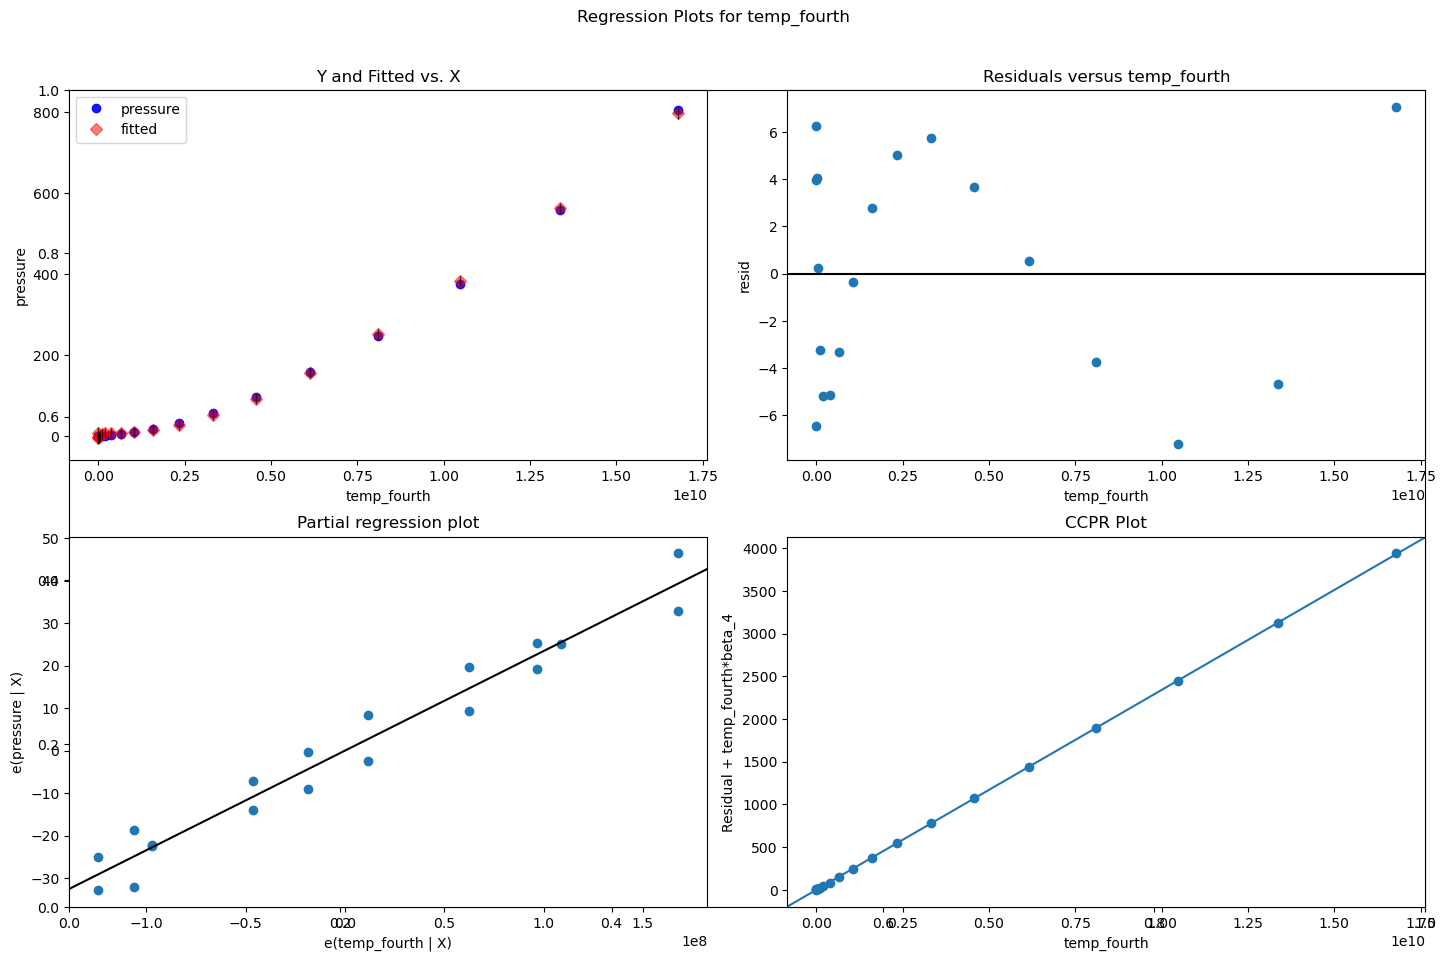

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'temp_fourth', fig=fig)
plt.show()

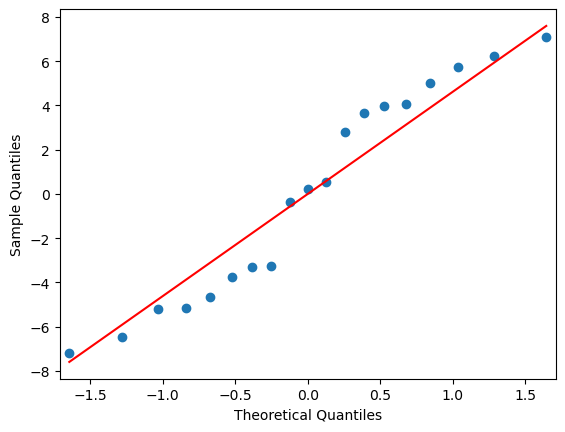

In [11]:
fig = sm.qqplot(results.resid, line="s")

## Heteroskedastic Data
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

In [12]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [13]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [14]:
print(tmdb.shape)
tmdb = tmdb[tmdb['budget'] != 0]
print(tmdb.shape)
tmdb = tmdb[tmdb['runtime'] != 0]
print(tmdb.shape)
tmdb = tmdb[tmdb['vote_count'] != 0]
print(tmdb.shape)
tmdb = tmdb[tmdb['revenue'] != 0]
print(tmdb.shape)

(4803, 20)
(3766, 20)
(3764, 20)
(3753, 20)
(3227, 20)


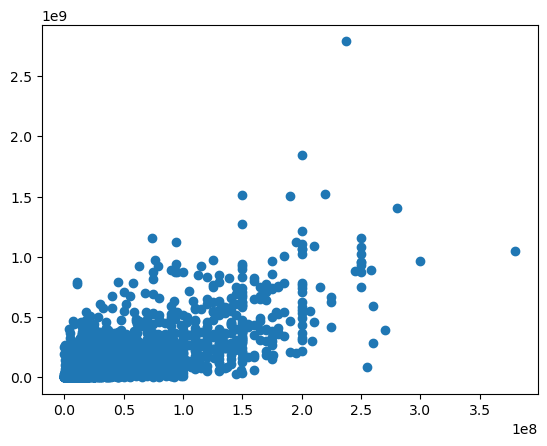

In [15]:
plt.scatter(tmdb['budget'], tmdb['revenue'])

In [16]:
results = smf.ols('revenue ~ budget', data=tmdb).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3192.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        18:31:57   Log-Likelihood:                -64920.
No. Observations:                3227   AIC:                         1.298e+05
Df Residuals:                    3225   BIC:                         1.299e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.082e+05   3.15e+06      0.288      0.773   -5.28e+06    7.09e+06
budget         2.9600      0.052     56.501      0.000       2.857       3.063
==============================================================================
Omnibus:                     2525.922   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128770.597
Skew:                           3.275   Prob(JB):                         0.00
Kurtosis:                      33.246   Cond. No.                     8.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


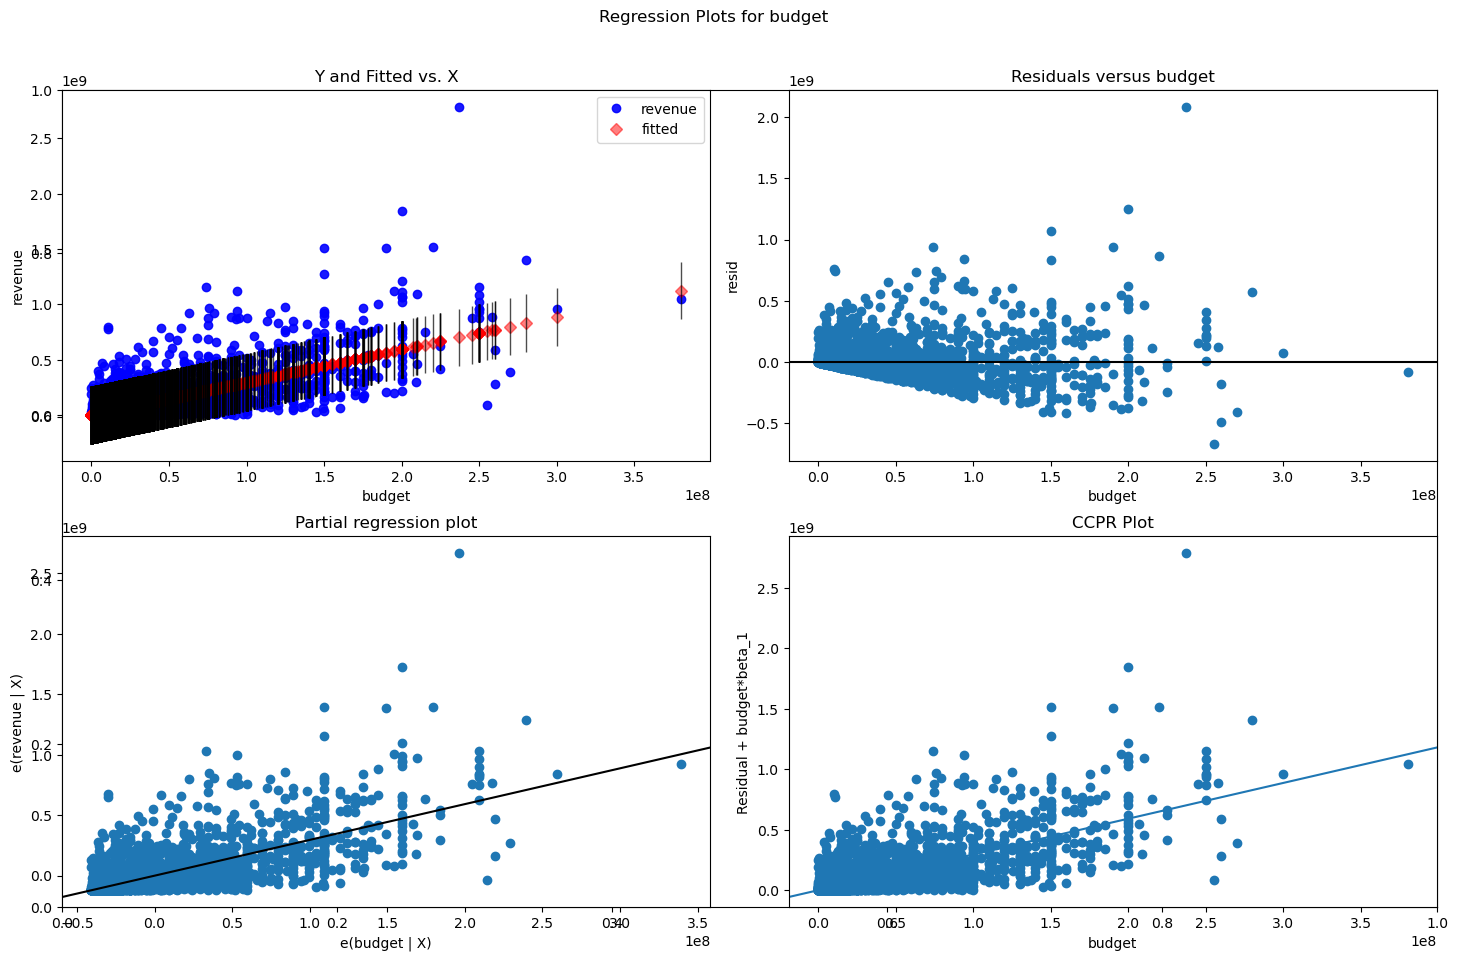

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'budget', fig=fig)
plt.show()

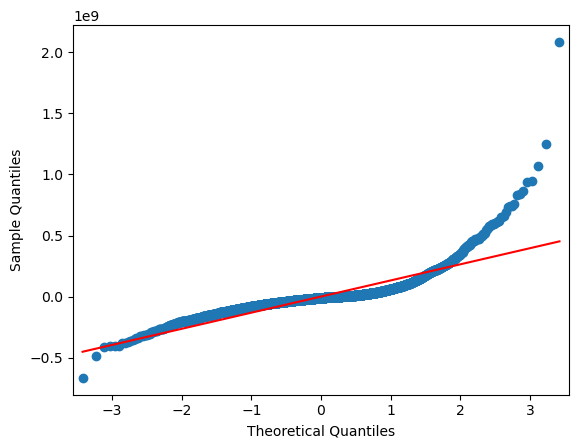

In [18]:
fig = sm.qqplot(results.resid, line="s")

In [19]:
results = smf.ols('np.sqrt(revenue) ~ budget', data=tmdb).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.sqrt(revenue)   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     3553.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        18:31:58   Log-Likelihood:                -31722.
No. Observations:                3227   AIC:                         6.345e+04
Df Residuals:                    3225   BIC:                         6.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4552.9845    107.399     42.393      0.000    4342.407    4763.562
budget         0.0001   1.78e-06     59.608      0.000       0.000       0.000
==============================================================================
Omnibus:                      505.651   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1148.269
Skew:                           0.902   Prob(JB):                    4.54e-250
Kurtosis:                       5.299   Cond. No.                     8.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


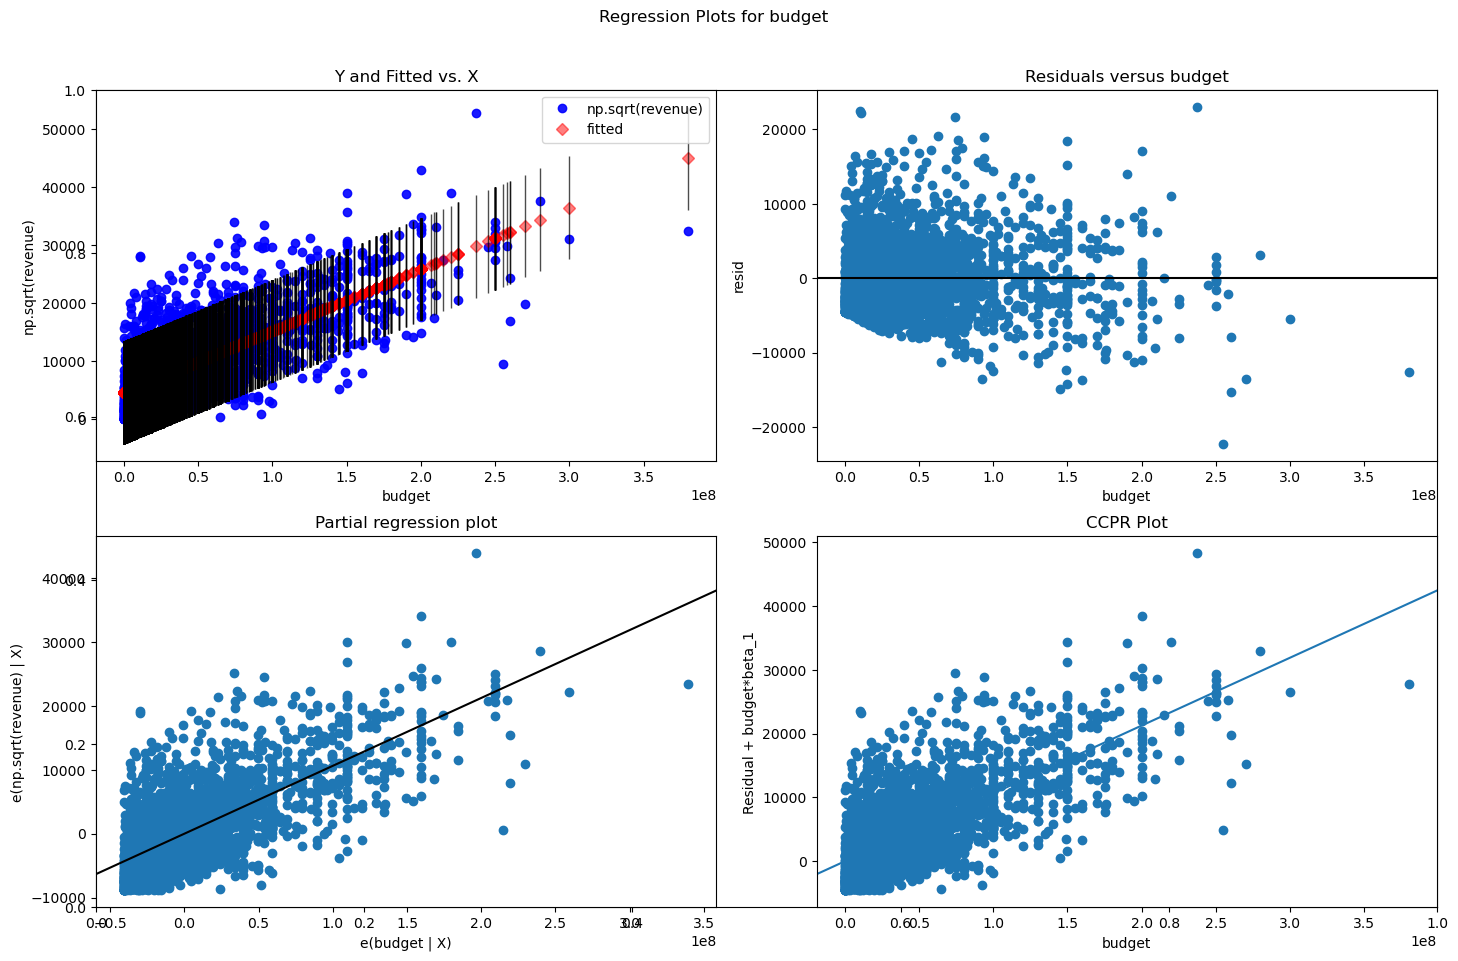

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'budget', fig=fig)
plt.show()

## Outliers

Text(0, 0.5, 'Studentized Residuals')

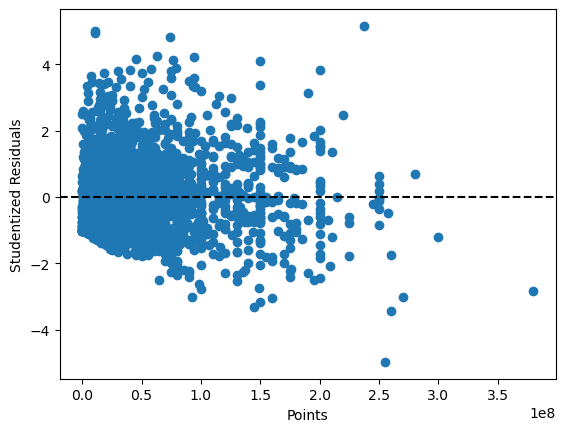

In [21]:
stud_res = results.outlier_test()
y = stud_res['student_resid']
x = tmdb['budget']
plt.scatter(x, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Studentized Residuals') 

## High-Leverage Points

In [22]:
tmdb.shape

(3227, 20)

In [23]:
p = 1
n = tmdb.shape[0]

(p+1)/n

0.0006197706848466068

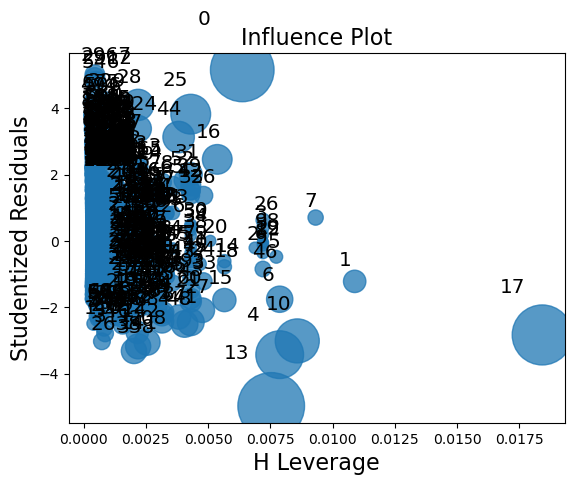

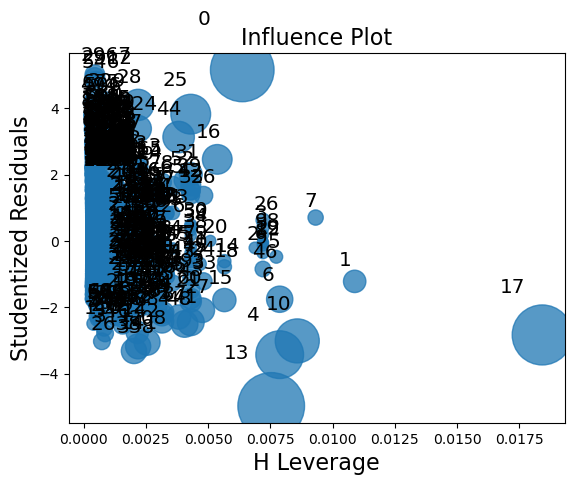

In [24]:
sm.graphics.influence_plot(results)

In [25]:
tmdb.iloc[17,:]

budget                                                          380000000
genres                  [{"id": 12, "name": "Adventure"}, {"id": 28, "...
homepage                http://disney.go.com/pirates/index-on-stranger...
id                                                                   1865
keywords                [{"id": 658, "name": "sea"}, {"id": 1316, "nam...
original_language                                                      en
original_title                Pirates of the Caribbean: On Stranger Tides
overview                Captain Jack Sparrow crosses paths with a woma...
popularity                                                     135.413856
production_companies    [{"name": "Walt Disney Pictures", "id": 2}, {"...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2011-05-14
revenue                                                        1045713802
runtime                               

## Collinearity

In [26]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [27]:
results = smf.ols('np.sqrt(revenue) ~ budget + popularity + runtime + vote_count', data=tmdb).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.sqrt(revenue)   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1760.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        18:32:05   Log-Likelihood:                -31051.
No. Observations:                3227   AIC:                         6.211e+04
Df Residuals:                    3222   BIC:                         6.214e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3541.3688    350.384     10.107      0.000    2854.371    4228.367
budget      6.818e-05   1.74e-06     39.285      0.000    6.48e-05    7.16e-05
popularity    15.3925      2.690      5.723      0.000      10.119      20.666
runtime        2.4450      3.198      0.765      0.445      -3.825       8.715
vote_count     1.8872      0.074     25.372      0.000       1.741       2.033
==============================================================================
Omnibus:                      240.035   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.069
Skew:                           0.419   Prob(JB):                    5.60e-138
Kurtosis:                       5.000   Cond. No.                     3.28e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = tmdb[['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']]

for i in range(len(X.columns)):
    print(variance_inflation_factor(X.values, i))

2.7931150496616652
3.758201754774334
34.02282394740025
3.9048646568258736
32.5623834695391


In [29]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,budget,2.793115
1,popularity,3.758202
2,runtime,34.022824
3,vote_count,3.904865
4,vote_average,32.562383


In [30]:
corr = tmdb.corr()
corr.style.background_gradient(cmap='RdBu')

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


## Energy Efficiency
https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set

In [31]:
energy = pd.read_csv("energy_efficiency_data.csv")
energy.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [32]:
corr = energy.corr()
corr.style.background_gradient(cmap='RdBu')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000,-0.991901,-0.203782,-0.868823,0.827747,0.000000,-0.000000,-0.000000,0.622272,0.634339
Surface_Area,-0.991901,1.000000,0.195502,0.880720,-0.858148,-0.000000,0.000000,0.000000,-0.658120,-0.672999
Wall_Area,-0.203782,0.195502,1.000000,-0.292316,0.280976,-0.000000,-0.000000,0.000000,0.455671,0.427117
Roof_Area,-0.868823,0.880720,-0.292316,1.000000,-0.972512,-0.000000,-0.000000,-0.000000,-0.861828,-0.862547
Overall_Height,0.827747,-0.858148,0.280976,-0.972512,1.000000,0.000000,0.000000,-0.000000,0.889431,0.895785
Orientation,0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.002587,0.014290
Glazing_Area,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,1.000000,0.212964,0.269841,0.207505
Glazing_Area_Distribution,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.212964,1.000000,0.087368,0.050525
Heating_Load,0.622272,-0.658120,0.455671,-0.861828,0.889431,-0.002587,0.269841,0.087368,1.000000,0.975862
Cooling_Load,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


In [33]:
results = smf.ols('Heating_Load ~ Wall_Area + Relative_Compactness + Overall_Height', data=energy).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heating_Load   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1333.
Date:                Thu, 30 May 2024   Prob (F-statistic):          5.40e-303
Time:                        18:32:06   Log-Likelihood:                -2161.9
No. Observations:                 768   AIC:                             4332.
Df Residuals:                     764   BIC:                             4350.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -7.1629      3.636     -1.970      0.049     -14.301      -0.025
Wall_Area                0.0350      0.006      5.869      0.000       0.023       0.047
Relative_Compactness   -14.5324      4.204     -3.457      0.001     -22.786      -6.279
Overall_Height           5.6068      0.259     21.642      0.000       5.098       6.115
==============================================================================
Omnibus:                       39.693   Durbin-Watson:                   0.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.662
Skew:                          -0.428   Prob(JB):                     1.83e-13
Kurtosis:                       4.049   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


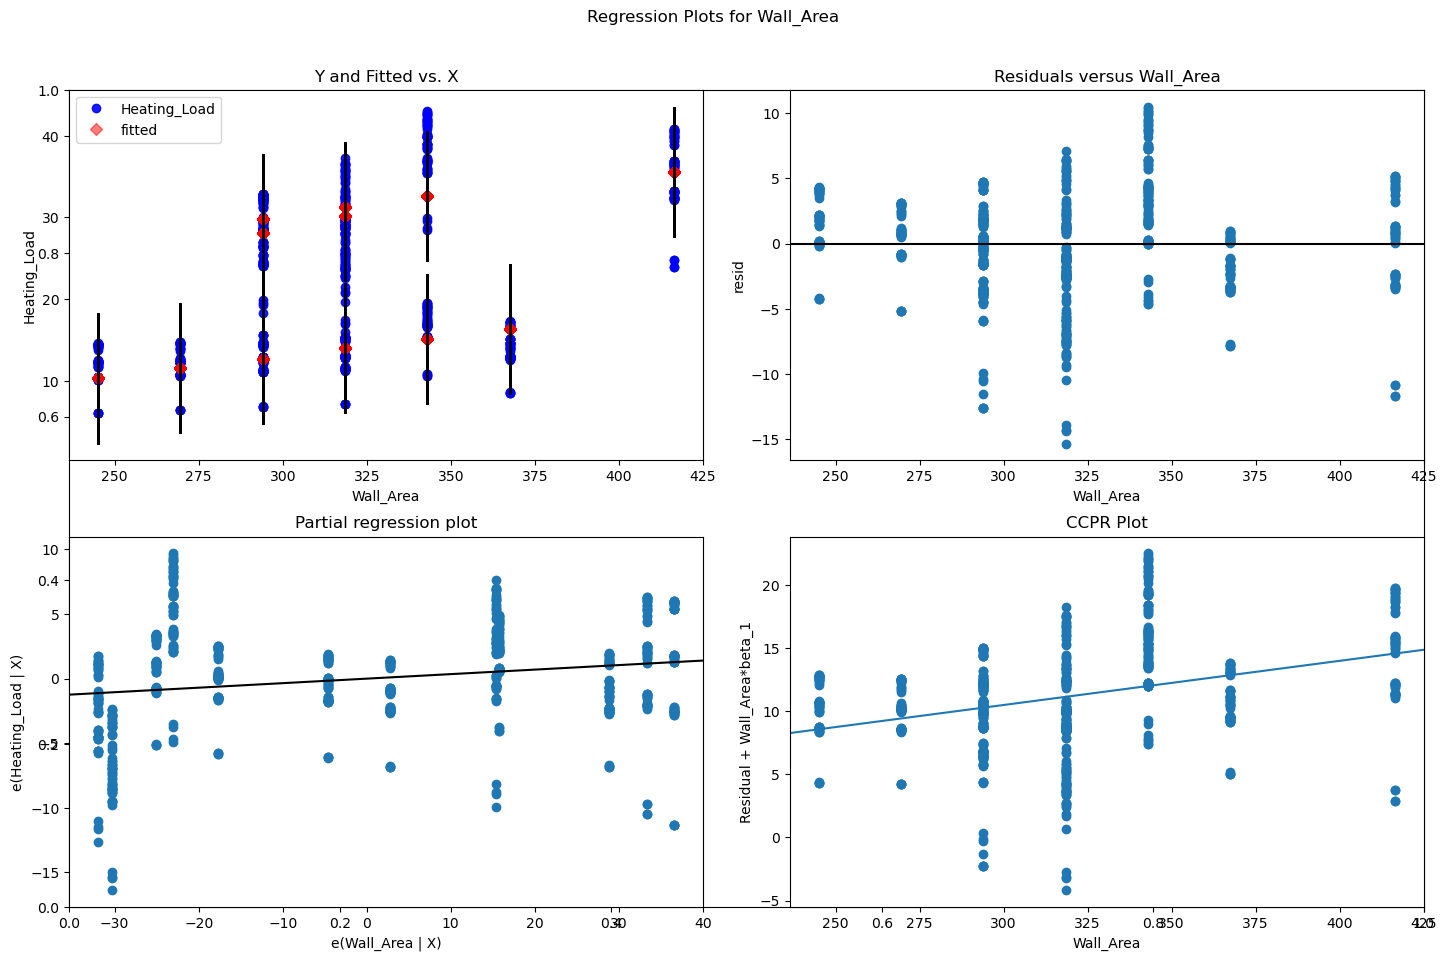

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'Wall_Area', fig=fig)
plt.show()

eval_env: 1


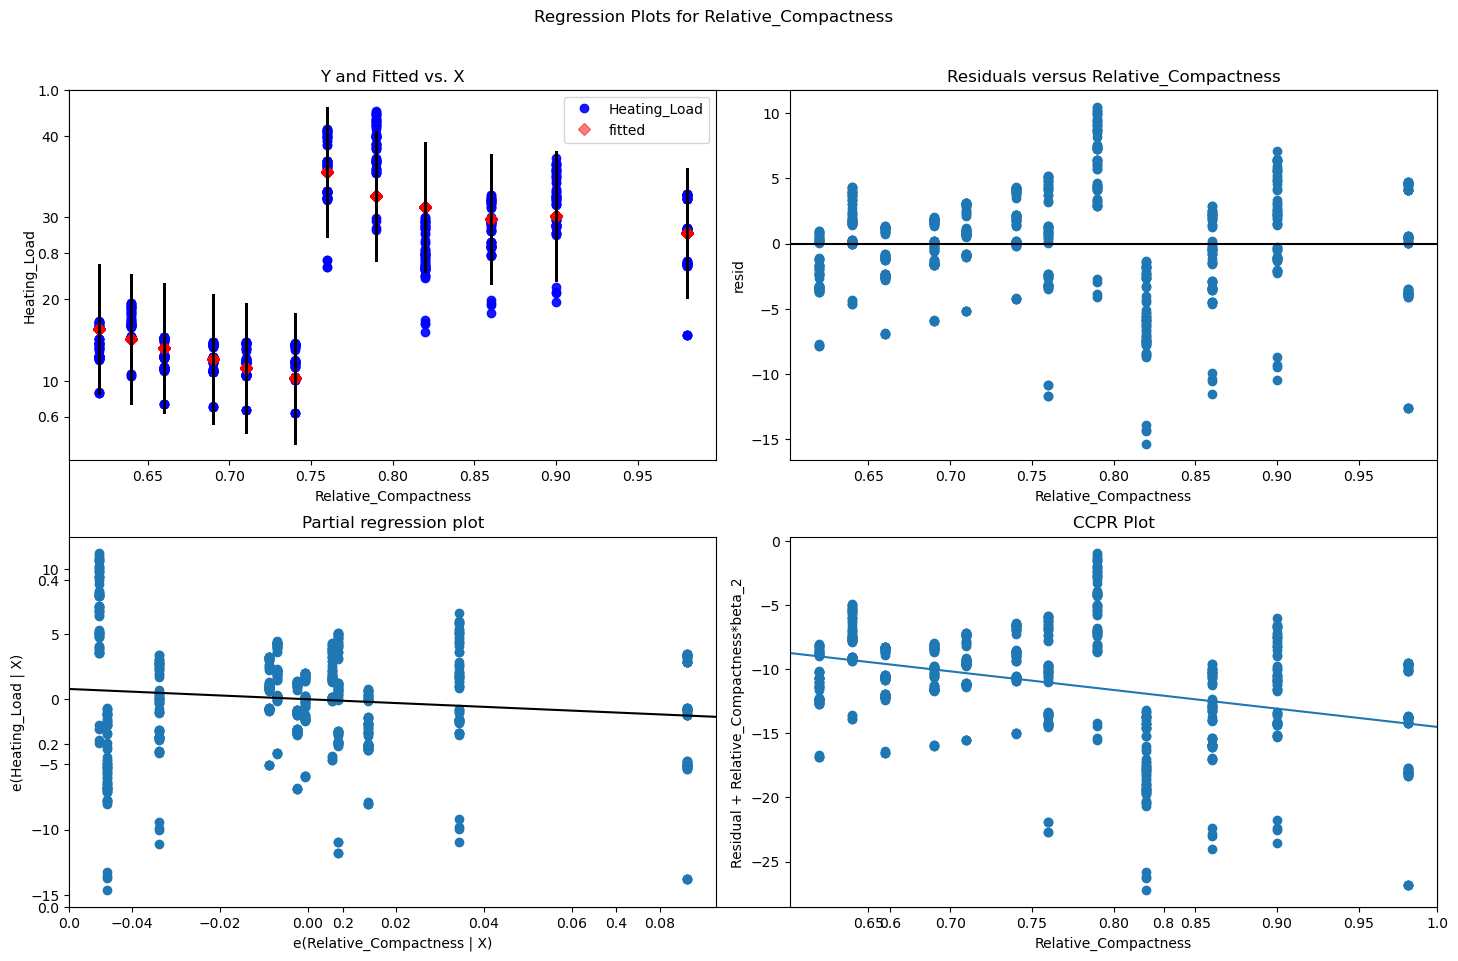

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'Relative_Compactness', fig=fig)
plt.show()

eval_env: 1


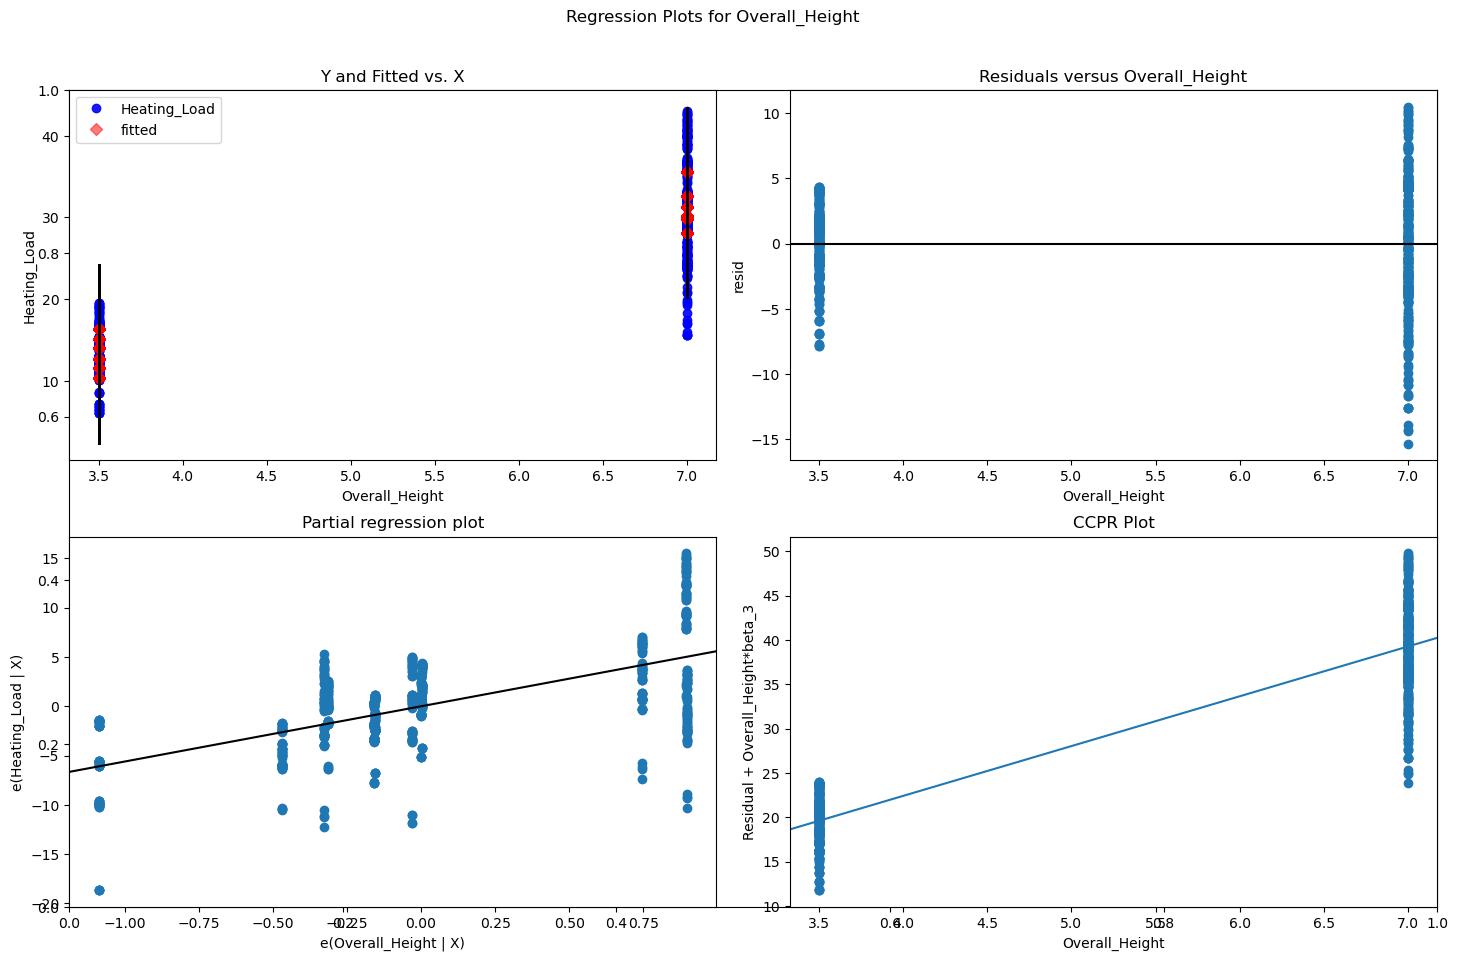

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'Overall_Height', fig=fig)
plt.show()

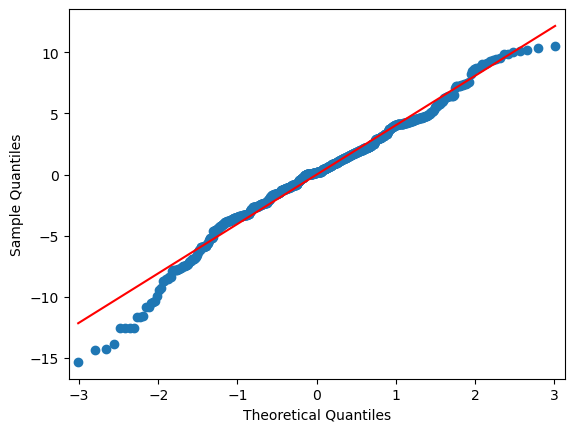

In [37]:
fig = sm.qqplot(results.resid, line="s")

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = energy[['Wall_Area', 'Relative_Compactness', 'Overall_Height']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature        VIF
0             Wall_Area  22.637136
1  Relative_Compactness  44.032578
2        Overall_Height  20.778757
